In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

One important way to check metrics for problems is to look at how the results change
over time. This can be done with an aggregate query that selects the count, average,
minimum, and maximum separately for each date. This doesn’t tell us everything
about the values of the metric, but it should alert us to any major issues because such
problems usually result in unusual movements in one of these summary statistics. 

Here, we plot the values over time for the qa metrics for our 'likes per month' metric.

In [3]:
metric_name = 'like_per_month'
metric_path = 'like_metrics_qa.csv'

In [4]:
# read in the qa data for the like event metrics:
qa_data_df = pd.read_csv(metric_path)

In [17]:
def qa_subplot(qa_data_df, field, number, linestyle):
 plt.subplot(4, 1, number)
 plt.plot('calc_date', field, data=qa_data_df, marker='', 
 linestyle=linestyle, color='black', linewidth=2, label=field)
 plt.ylim(0, ceil(1.1 * qa_data_df[field].dropna().max()))
 plt.legend()

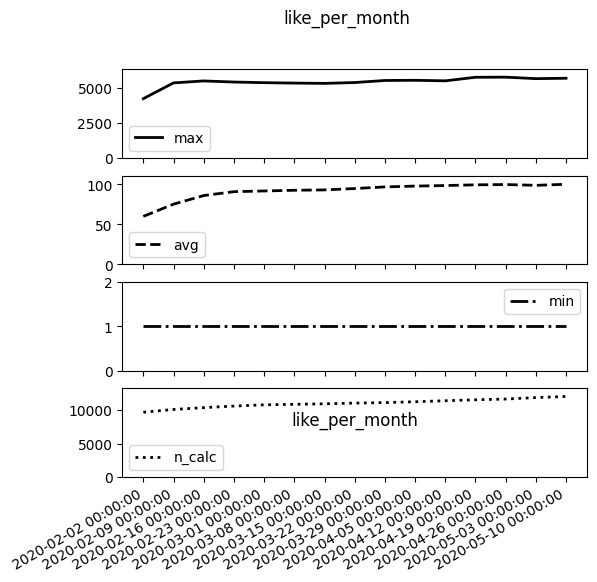

In [22]:
# set up the figure, create subplots for each qa metric
plt.figure(figsize=(6, 6))
qa_subplot(qa_data_df,'max', 1, None) 
qa_subplot(qa_data_df,'avg', 2, '--')
qa_subplot(qa_data_df,'min', 3, '-.')
qa_subplot(qa_data_df,'n_calc', 4, ':')

# Automatically adjusts the x-axis tick labels to best fit the available space. 
# Specifically designed for formatting and displaying dates on the x-axis.
plt.gca().figure.autofmt_xdate()
plt.title(metric_name, y=0.5)
plt.suptitle(metric_name, fontsize=12)

plt.show()